# DM cube

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
/bin/rm -rf 1463
download_chandra_obsid 1463 evt2
gunzip 1463/primary/acisf01463N007_evt2.fits.gz
mv 1463/primary/acisf01463N007_evt2.fits .


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        5 Mb  ####################          < 1 s  23505.6 kb/s



## Create Cube

In [3]:
dmlist "acisf01463N007_evt2.fits[bin x=::8,y=::8,time=::1000]" cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[1024,1024,23]              Int2(1024x1024x23) -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+0.50)[pixel] +(+8.0)* ((#1)-(+0.50))
                 (y)   (+0.50)         (+8.0)  ((#2) (+0.50))
   2   3      time                 = +59969682.285558 [s] +1000.0 * (#3  -0.50)
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
---------------------------------------------------------------

In [4]:
dmlist "acisf01463N007_evt2.fits[bin x=3900:4400,y=4100:4600,time=::1000]" cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[500,500,23]              Int2(500x500x23) -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+3900.0)[pixel] +(+1.0)* ((#1)-(+0.50))
                 (y)   (+4100.0)         (+1.0)  ((#2) (+0.50))
   2   3      time                 = +59969682.285558 [s] +1000.0 * (#3  -0.50)
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
---------------------------------------------------------------

In [5]:
dmcopy "acisf01463N007_evt2.fits[bin x=3900:4400,y=4100:4600,time=::1000]" jupiter_cube.fits cl+

In [6]:
dmlist jupiter_cube.fits blocks

 
--------------------------------------------------------------------------------
Dataset: jupiter_cube.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: EVENTS_IMAGE                   Image      Int2(500x500x23)
Block    2: GTI7                           Table         2 cols x 4        rows
Block    3: GTI0                           Table         2 cols x 2        rows
Block    4: GTI1                           Table         2 cols x 2        rows
Block    5: GTI2                           Table         2 cols x 3        rows
Block    6: GTI3                           Table         2 cols x 5        rows


## Display Cube

[1] 6192
[1]+  Done                    ds9 jupiter_cube.fits -log -saveimage png ds9_01.png


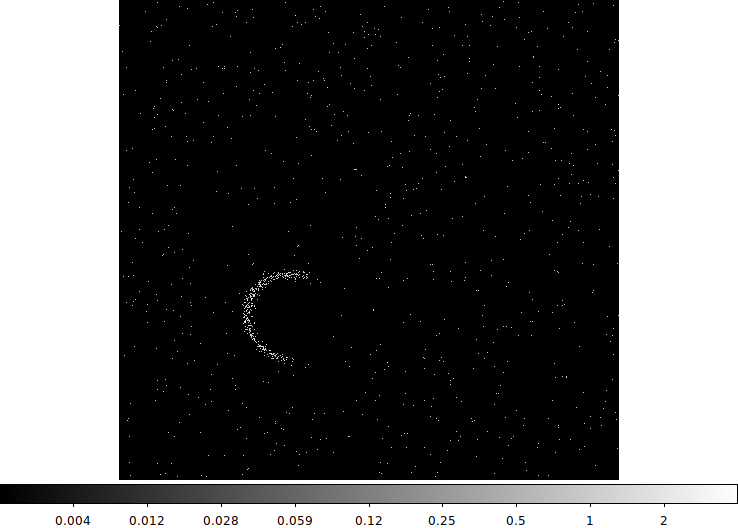

In [7]:
ds9 jupiter_cube.fits -log -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

[1] 6257
[1]+  Done                    ds9 -3d jupiter_cube.fits -log -3d az 60 -3d el 30 -saveimage png ds9_02.png


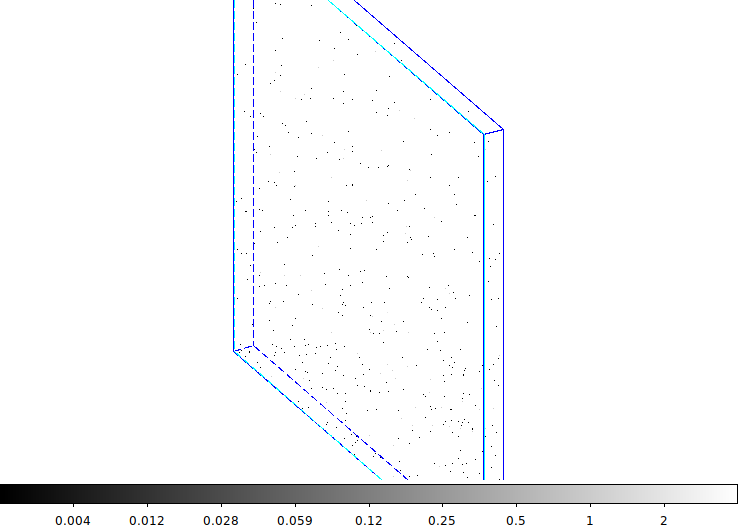

In [8]:
ds9 -3d jupiter_cube.fits -log -3d az 60 -3d el 30 -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## Manipulate Cube

In [9]:
dmcopy "jupiter_cube.fits[time=59969680:59973180]" range_cube.fits clob+


In [10]:
dmlist range_cube.fits cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[500,500,4]              Int2(500x500x4) -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+3900.0) +(+1.0)* ((#1)-(+0.50))
                 (y)   (+4100.0)  (+1.0)  ((#2) (+0.50))
   2   3      time                 = +59969682.285558 [s] +1000.0 * (#3  -0.50)
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
-------------------------------------------------------------------------------

## Region Filtering

In [11]:
cat << EOM > circle.reg 
# Region file format: CIAO version 1.0
circle(4143.5,4266.5,137.16489)
EOM

[1] 6417
[1]+  Done                    ds9 jupiter_cube.fits -log -region circle.reg -saveimage png ds9_03.png


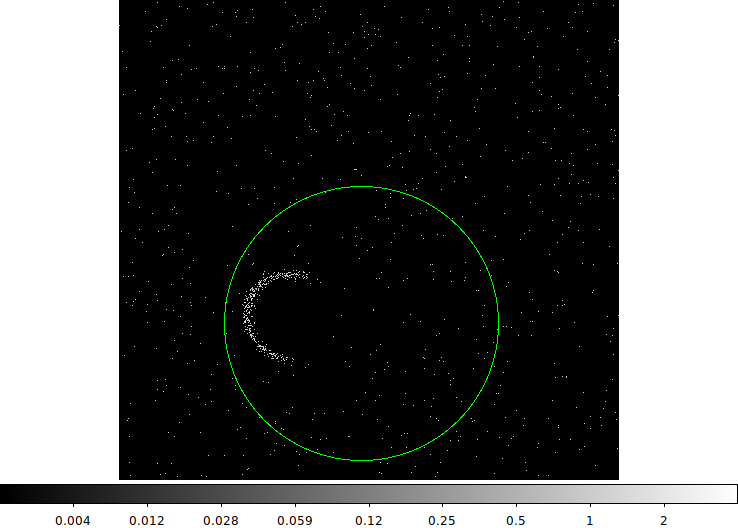

In [12]:
ds9 jupiter_cube.fits -log -region circle.reg -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

In [13]:
dmcopy "jupiter_cube.fits[sky=region(circle.reg)][opt null=-99]" region_cube.fits cl+

In [14]:
dmlist region_cube.fits cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   EVENTS_IMAGE[275,275,23]              Int2(275x275x23) -                    -99        
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+4006.0) +(+1.0)* ((#1)-(+0.50))
                 (y)   (+4129.0)  (+1.0)  ((#2) (+0.50))
   2   3      time                 = +59969682.285558 [s] +1000.0 * (#3  -0.50)
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------

[1] 6468
[1]+  Done                    ds9 region_cube.fits -log -region circle.reg -saveimage png ds9_04.png


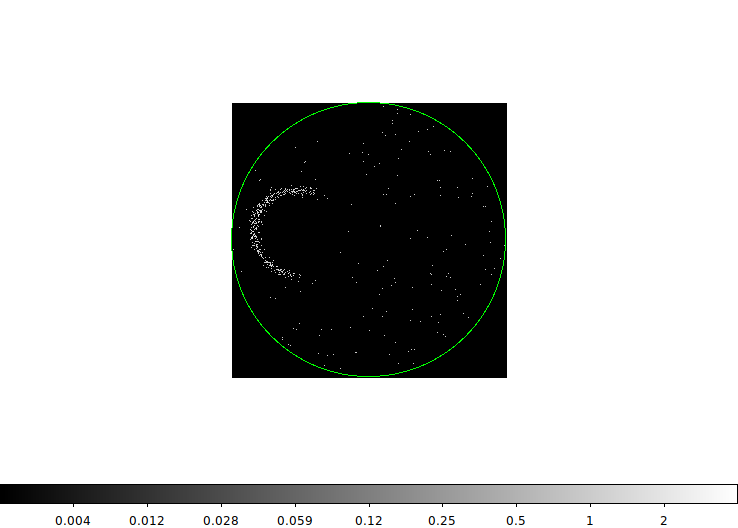

In [15]:
ds9 region_cube.fits -log -region circle.reg -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png

## Slicing

In [16]:
dmcopy "jupiter_cube.fits[#3=10][bin x,y]" plane10.fits cl+

In [17]:
dmlist plane10.fits cols

 
--------------------------------------------------------------------------------
Columns for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   EVENTS_IMAGE[500,500]              Int2(500x500)  -                    
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    sky(x) = (+3900.0) +(+1.0)* ((#1)-(+0.50))
                 (y)   (+4100.0)  (+1.0)  ((#2) (+0.50))
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block EVENTS_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    EQPOS(RA ) = (+24.6834)[deg] +TAN[(-0.000136667)* (

[1] 6549
[1]+  Done                    ds9 plane10.fits -log -saveimage png ds9_05.png


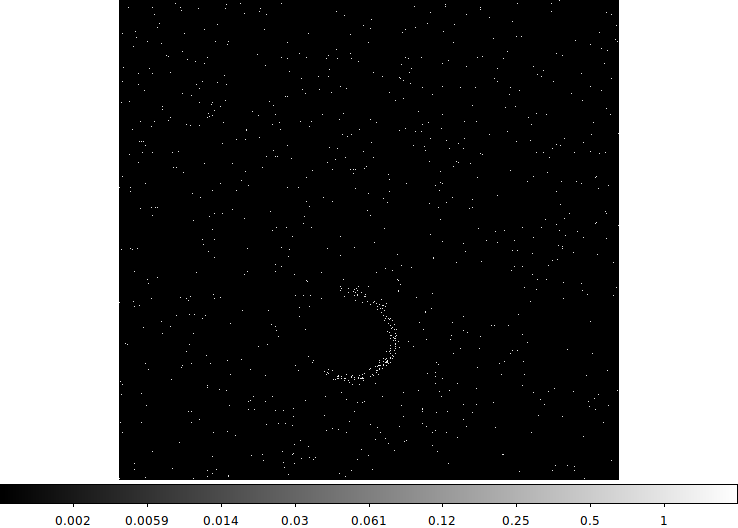

In [18]:
ds9 plane10.fits -log -saveimage png ds9_05.png &
sleep 10
xpaset -p ds9 quit

display < ds9_05.png

## 4D radio cubes

In [19]:
curl -O http://hea-www.harvard.edu/~kjg/current_regtest/input/dm/vla_radio.img

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  309k  100  309k    0     0  1242k      0 --:--:-- --:--:-- --:--:-- 1247k


In [20]:
dmlist vla_radio.img cols

 
--------------------------------------------------------------------------------
Columns for Image Block PRIMARY
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   PRIMARY[256,256,1,1] JY/BEAM      Real4(256x256x1x1) -Inf:+Inf            
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block PRIMARY
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    POS(X) = (#1) 
                 (Y)   (#2)
   2   3      Z                    = #3 
   3   4      #AXIS4               = #4 
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block PRIMARY
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    EQPOS(RA ) = (+265.6222) +SIN[(-0.0002

In [21]:
dmcopy "vla_radio.img[bin x,y]" vla_ra_dec.img cl+

In [22]:
dmlist vla_ra_dec.img cols

 
--------------------------------------------------------------------------------
Columns for Image Block PRIMARY_IMAGE
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   PRIMARY_IMAGE[256,256] JY/BEAM      Real4(256x256) -Inf:+Inf            
 
--------------------------------------------------------------------------------
Physical Axis Transforms for Image Block PRIMARY_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    POS(X) = (#1) 
                 (Y)   (#2)
 
--------------------------------------------------------------------------------
World Coordinate Axis Transforms for Image Block PRIMARY_IMAGE
--------------------------------------------------------------------------------
 
Group# Axis# 
   1   1,2    EQPOS(RA ) = (+265.6222) +SIN[(-0.000277778)* (POS(X)-(+128.0))]
                   (DEC)   (-28.9884 ) 

[1] 6614
[1]+  Done                    ds9 vla_ra_dec.img -log -zoom 2 -saveimage png ds9_06.png


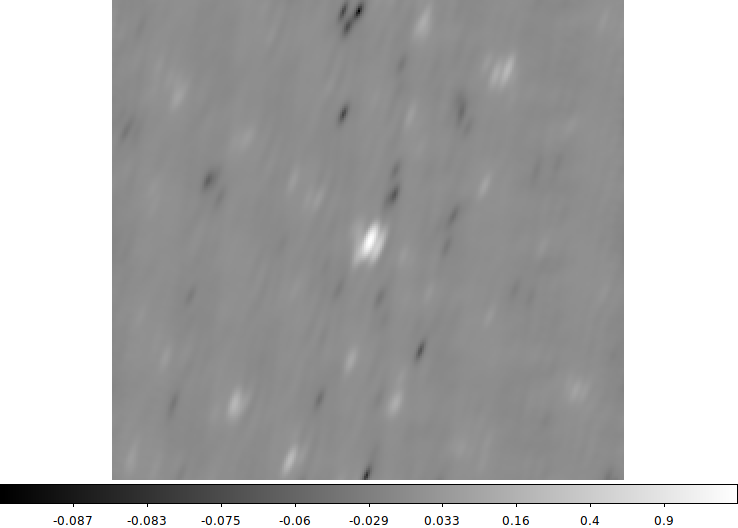

In [23]:
ds9 vla_ra_dec.img -log -zoom 2 -saveimage png ds9_06.png &
sleep 10
xpaset -p ds9 quit

display < ds9_06.png

# Cleanup


In [24]:
/bin/rm -f vla_radio.img
/bin/rm -rf 1463
/bin/rm -f acisf*evt2.fits
